<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [ ]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import randint as sp_randint
import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [ ]:
!wget --header="Host: doc-0o-bk-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_nso6dcn1mbidkt5qr539a2jiefc09pqv_nonce=iak2ig7rpq664" --header="Connection: keep-alive" "https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr" -c -O 'storage_sample_stage4.h5'

--2022-09-08 12:55:28--  https://doc-0o-bk-docs.googleusercontent.com/docs/securesc/nss2f5s2soorprev6d4t4qp3n5ekp9nh/evl2j2j4t5hronicnhsbdlsblnbl9qk3/1622116650000/06629147635963609455/13017565264516993811/1fDJptlCFEWNV5UNGPc4geTykgFI3PDCV?e=download&authuser=0&nonce=iak2ig7rpq664&user=13017565264516993811&hash=fvl5s6dohfnqle6k8q3koe9jr2mhe6jr
Resolving doc-0o-bk-docs.googleusercontent.com (doc-0o-bk-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connecting to doc-0o-bk-docs.googleusercontent.com (doc-0o-bk-docs.googleusercontent.com)|74.125.31.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2022-09-08 12:55:28 ERROR 403: Forbidden.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('/content/drive/MyDrive/Colab Notebooks/Assignments/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('/content/drive/MyDrive/Colab Notebooks/Assignments/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [ ]:
df_final_test.head()

,source_node,destination_node,indicator_link,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,848424,784690,1,0,0.0,0.029161,0.000000,14,6,9,...,5.904807e-11,2.701538e-12,4.341620e-13,5.535503e-14,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12
1,483294,1255532,1,0,0.0,0.000000,0.000000,17,1,19,...,2.545382e-10,2.248568e-14,3.600957e-13,4.701436e-15,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14
2,626190,1729265,1,0,0.0,0.000000,0.000000,10,16,9,...,1.122150e-05,1.778927e-12,2.740535e-13,4.199834e-14,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14
3,947219,425228,1,0,0.0,0.000000,0.000000,37,10,34,...,5.223676e-06,7.917166e-13,4.020707e-12,2.817657e-13,-2.162590e-11,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13
4,991374,975044,1,0,0.2,0.042767,0.347833,27,15,27,...,1.035016e-06,1.361574e-13,1.154623e-12,9.656662e-14,-8.742904e-12,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13


In [ ]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [ ]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

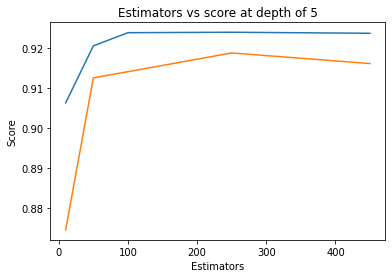

In [ ]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


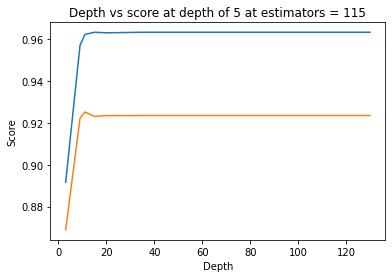

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25,return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [ ]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [ ]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


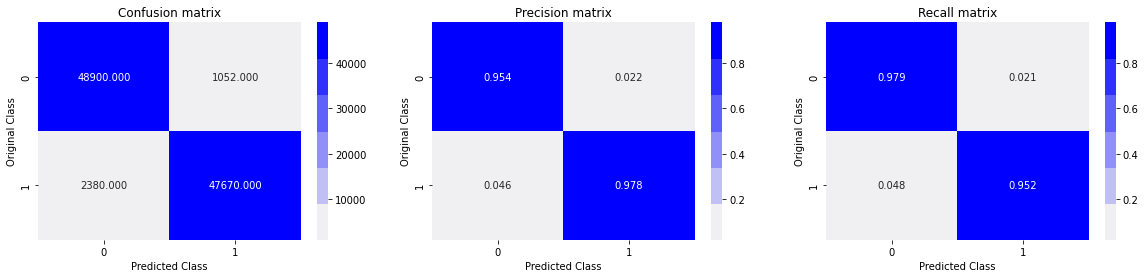

Test confusion_matrix


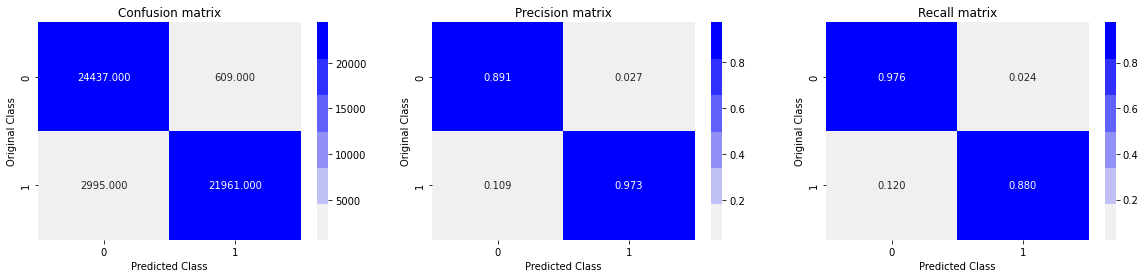

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

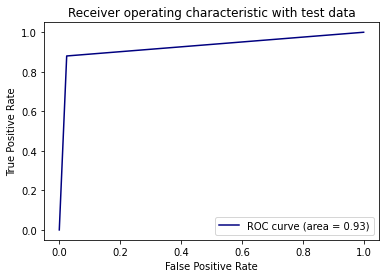

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

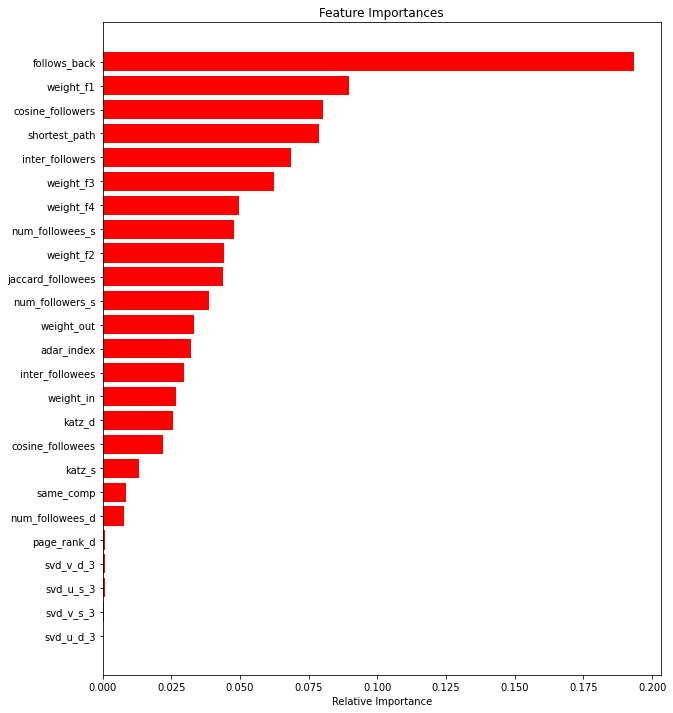

In [ ]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

In [ ]:
if os.path.isfile('/content/drive/MyDrive/Colab Notebooks/Assignments/fea_sample/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('/content/drive/MyDrive/Colab Notebooks/Assignments/fea_sample/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

DiGraph with 1780722 nodes and 7550015 edges


In [ ]:
def compute_features_stage1(df_final):
    #calculating no of followers followees for source and destination
    #calculating intersection of followers and followees for source and destination
    num_followers_s=[]
    num_followees_s=[]
    num_followers_d=[]
    num_followees_d=[]
    inter_followers=[]
    inter_followees=[]
    for i,row in df_final.iterrows():
        try:
            s1=set(train_graph.predecessors(row['source_node']))
            s2=set(train_graph.successors(row['source_node']))
        except:
            s1 = set()
            s2 = set()
        try:
            d1=set(train_graph.predecessors(row['destination_node']))
            d2=set(train_graph.successors(row['destination_node']))
        except:
            d1 = set()
            d2 = set()
        num_followers_s.append(len(s1))
        num_followees_s.append(len(s2))

        num_followers_d.append(len(d1))
        num_followees_d.append(len(d2))

        inter_followers.append(len(s1.intersection(d1)))
        inter_followees.append(len(s2.intersection(d2)))
    return num_followers_d
    #return  num_followers_s,num_followees_s,num_followers_d,num_followees_d,inter_followers,inter_followees

In [ ]:
df_final_train['num_followers_d'] = compute_features_stage1(df_final_train)
    
df_final_test['num_followers_d'] = compute_features_stage1(df_final_test)
    

In [ ]:
df_final_train.head(2)

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d
0,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,...,1.545075e-13,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0
1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,...,1.345726e-02,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0


In [ ]:
def Preferential_Attachment(a, b):

  try:

    if len(set(train_graph.successors(a))) == 0 | len(set(train_graph.successors(b))) == 0:

      return 0

    pref_score = len(set(train_graph.successors(a)))*len(set(train_graph.successors(b)))

    return pref_score

  except:

    return 0

In [ ]:
#Adding Preferential Attachments for followers train data [s[i]*d[i]]

s = np.array(df_final_train["num_followers_s"])
d = np.array(df_final_train["num_followers_d"])

df_final_train["followers_preferential"] = Preferential_Attachment(s,d)

In [ ]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,followers_preferential
0,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,...,8.108434e-13,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0,0
1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,...,3.703479e-12,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0,0
2,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,...,1.940403e-19,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0,0
3,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,...,1.513483e-12,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0,0
4,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,...,3.360247e-13,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0


In [ ]:
#Adding Preferential Attachments for followers train data [s[i]*d[i]]

s = np.array(df_final_train["num_followees_s"])
d = np.array(df_final_train["num_followees_d"])

df_final_train["followees_preferential"] = Preferential_Attachment(s,d)



In [ ]:
#for followers test data

s = np.array(df_final_test["num_followers_s"])
d = np.array(df_final_test["num_followers_d"])

df_final_test["followers_preferential"] = Preferential_Attachment(s,d)

In [ ]:
#for followees test data

s = np.array(df_final_test["num_followees_s"])
d = np.array(df_final_test["num_followees_d"])

df_final_test["followees_preferential"] = Preferential_Attachment(s,d)




In [ ]:
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,followers_preferential,followees_preferential
0,0,0.0,0.029161,0.000000,14,6,9,1,0,0.000000,...,5.535503e-14,-9.994076e-10,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,0,0,0
1,0,0.0,0.000000,0.000000,17,1,19,0,0,0.000000,...,4.701436e-15,-9.360516e-12,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,0,0,0
2,0,0.0,0.000000,0.000000,10,16,9,0,0,0.000000,...,4.199834e-14,-4.253075e-13,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,0,0,0
3,0,0.0,0.000000,0.000000,37,10,34,0,0,0.000000,...,2.817657e-13,-2.162590e-11,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13,0,0,0
4,0,0.2,0.042767,0.347833,27,15,27,4,7,6.136433,...,9.656662e-14,-8.742904e-12,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13,0,0,0


In [ ]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,followers_preferential,followees_preferential
0,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,...,1.719702e-14,-1.355368e-12,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0,0,0
1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,...,2.251737e-10,1.245101e-12,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0,0,0
2,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,...,-3.365389e-19,-1.238370e-18,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0,0,0
3,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,...,4.498061e-13,-9.818087e-10,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0,0,0
4,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,...,1.407670e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0


In [ ]:
#Adding svddot features to dataset      reference-https://www.kaggle.com/code/genialgokul1099/social-network-graph-link-prediction#5.-Featurization
svd_dot_U =[]
value = len(np.array(df_final_train["svd_u_d_1"]))
for i in range(value):
  u_s = []
  u_d = []
  u_s.append(np.array(df_final_train["svd_u_s_1"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_2"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_3"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_4"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_5"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_6"][i]))

  u_d.append(np.array(df_final_train["svd_u_d_1"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_2"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_3"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_4"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_5"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_6"][i]))

  svd_dot_U.append(np.dot(u_s,u_d))

In [ ]:
df_final_train['svd_dot_U'] = svd_dot_U

In [ ]:
#for test data
svd_dot_U =[]
value = len(np.array(df_final_test["svd_u_d_1"]))
for i in range(value):
  u_s = []
  u_d = []
  u_s.append(np.array(df_final_test["svd_u_s_1"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_2"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_3"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_4"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_5"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_6"][i]))

  u_d.append(np.array(df_final_test["svd_u_d_1"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_2"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_3"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_4"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_5"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_6"][i]))

  svd_dot_U.append(np.dot(u_s,u_d))

In [ ]:
df_final_test['svd_dot_U'] = svd_dot_U

In [ ]:
#for train data
svd_dot_V = []
range_value = len(np.array(df_final_train["svd_v_d_1"]))
for i in range(range_value):
  v_s = []
  v_d = []
  v_s.append(np.array(df_final_train["svd_v_s_1"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_2"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_3"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_4"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_5"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_6"][i]))

  v_d.append(np.array(df_final_train["svd_v_d_1"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_2"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_3"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_4"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_5"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_6"][i]))

  svd_dot_V.append(np.dot(v_s,v_d))



df_final_train['svd_dot_V'] = svd_dot_V

In [ ]:
#for test data
svd_dot_V = []
range_value = len(np.array(df_final_test["svd_v_d_1"]))
for i in range(range_value):
  v_s = []
  v_d = []
  v_s.append(np.array(df_final_test["svd_v_s_1"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_2"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_3"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_4"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_5"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_6"][i]))

  v_d.append(np.array(df_final_test["svd_v_d_1"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_2"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_3"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_4"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_5"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_6"][i]))

  svd_dot_V.append(np.dot(v_s,v_d))


df_final_test['svd_dot_V'] = svd_dot_V

In [ ]:
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,followers_preferential,followees_preferential,svd_dot_U,svd_dot_V
0,0,0.0,0.029161,0.000000,14,6,9,1,0,0.000000,...,5.791910e-10,3.512364e-07,2.486658e-09,2.771146e-09,1.727694e-12,0,0,0,8.425267e-20,2.074808e-17
1,0,0.0,0.000000,0.000000,17,1,19,0,0,0.000000,...,3.206809e-10,4.668696e-08,6.665777e-12,1.495979e-10,9.836670e-14,0,0,0,1.352160e-17,1.188376e-17
2,0,0.0,0.000000,0.000000,10,16,9,0,0,0.000000,...,4.789463e-13,3.479824e-07,1.630549e-13,3.954708e-13,3.875785e-14,0,0,0,3.671980e-13,3.904885e-12
3,0,0.0,0.000000,0.000000,37,10,34,0,0,0.000000,...,6.939194e-12,1.879861e-05,4.384816e-12,1.239414e-11,6.483485e-13,0,0,0,1.634044e-10,9.819784e-11
4,0,0.2,0.042767,0.347833,27,15,27,4,7,6.136433,...,7.467370e-12,1.256880e-05,3.636983e-12,3.948463e-12,2.415863e-13,0,0,0,1.246700e-11,1.300892e-11


In [ ]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followees_s,num_followees_d,inter_followers,inter_followees,adar_index,...,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,num_followers_d,followers_preferential,followees_preferential,svd_dot_U,svd_dot_V
0,0,0.000000,0.000000,0.000000,6,15,8,0,0,0.000000,...,4.675307e-13,1.128591e-06,6.616550e-14,9.771077e-13,4.159752e-14,0,0,0,1.114958e-11,2.238775e-12
1,0,0.187135,0.028382,0.343828,94,61,142,11,32,16.362912,...,-1.636948e-10,-3.112650e-10,6.738902e-02,2.607801e-11,2.372904e-09,0,0,0,3.192812e-03,9.068719e-04
2,0,0.369565,0.156957,0.566038,28,41,22,26,17,10.991826,...,1.438175e-19,-1.852863e-19,-5.901864e-19,1.629341e-19,-2.572452e-19,0,0,0,1.787503e-35,2.467873e-36
3,0,0.000000,0.000000,0.000000,11,5,7,0,0,0.000000,...,3.454672e-11,5.213635e-08,9.595823e-13,3.047045e-10,1.246592e-13,0,0,0,4.710376e-20,3.159386e-18
4,0,0.000000,0.000000,0.000000,1,11,3,0,0,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,7.773952e-14,0.000000e+00


In [ ]:
df_final_train.columns[df_final_train.isna().any()].tolist()


[]

In [ ]:
df_final_train["followees_preferential"]

0         0
1         0
2         0
3         0
4         0
         ..
99997     0
99998     0
99999     0
100000    0
100001    0
Name: followees_preferential, Length: 100002, dtype: int64

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train = df_final_train
X_test = df_final_test

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
pip install xgboost --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 47 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from scipy import stats
from scipy.stats import randint

n_estimators =  100 Train Score 0.9821943497812102 test Score 0.9284608369212497
n_estimators =  200 Train Score 0.9902082748103856 test Score 0.9229785056294779
n_estimators =  500 Train Score 0.9975595607209298 test Score 0.9116138763197587
n_estimators =  1000 Train Score 0.9975595607209298 test Score 0.9116138763197587
n_estimators =  2000 Train Score 0.9975595607209298 test Score 0.9116138763197587


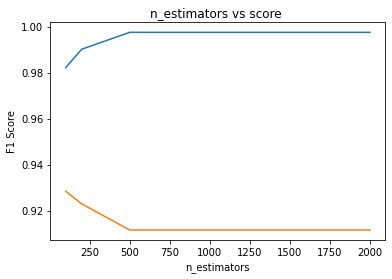

In [ ]:
n_estimators = [100,200,500,1000,2000]
train_scores = []
test_scores = []
for i in n_estimators:
    clf = XGBClassifier(subsample = 1.0, n_estimators=i , min_child_weight=5, max_depth=5, learning_rate=0.1866626528544617, gamma=1, colsample_bytree=1.0)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('n_estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(n_estimators,train_scores,label='Train Score')
plt.plot(n_estimators,test_scores,label='Test Score')
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.title('n_estimators vs score ')
plt.show()

learning_rate =  0.01 Train Score 0.9298960604050169 test Score 0.927090159602579
learning_rate =  0.03 Train Score 0.9640517882427242 test Score 0.9283665204184948
learning_rate =  0.05 Train Score 0.9723486884132183 test Score 0.9316757076218417
learning_rate =  0.1 Train Score 0.9763484805567919 test Score 0.9299360359215487
learning_rate =  0.15 Train Score 0.979907357883158 test Score 0.9290617848970252
learning_rate =  0.2 Train Score 0.9830129367670173 test Score 0.9272476382549623


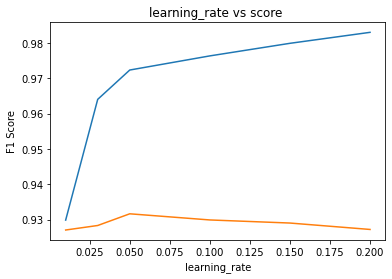

In [ ]:
learning_rate = [0.01,0.03,0.05,0.1,0.15,0.2]
train_scores = []
test_scores = []
for i in learning_rate:
    clf = XGBClassifier(subsample = 1.0, n_estimators=100 , min_child_weight=5, max_depth=5, learning_rate=i, gamma=1, colsample_bytree=1.0)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('learning_rate = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(learning_rate,train_scores,label='Train Score')
plt.plot(learning_rate,test_scores,label='Test Score')
plt.xlabel('learning_rate')
plt.ylabel('F1 Score')
plt.title('learning_rate vs score ')
plt.show()

gamma =  0.5 Train Score 0.9725185575791994 test Score 0.9318162627712573
gamma =  1 Train Score 0.9723486884132183 test Score 0.9316757076218417
gamma =  1.5 Train Score 0.9718582474487986 test Score 0.9310970464135021
gamma =  2 Train Score 0.971736859718687 test Score 0.9311101730688055
gamma =  5 Train Score 0.9723605602945501 test Score 0.9316919698473363


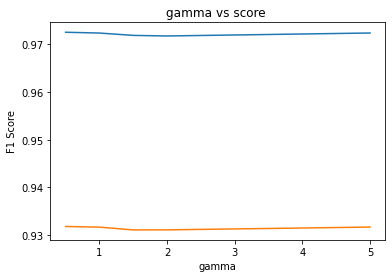

In [ ]:
gamma = [0.5, 1, 1.5, 2, 5]
train_scores = []
test_scores = []
for i in gamma:
    clf = XGBClassifier(subsample = 1.0, n_estimators=100 , min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=i, colsample_bytree=1.0)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('gamma = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(gamma,train_scores,label='Train Score')
plt.plot(gamma,test_scores,label='Test Score')
plt.xlabel('gamma')
plt.ylabel('F1 Score')
plt.title('gamma vs score ')
plt.show()

subsample =  0.6 Train Score 0.9724488038180547 test Score 0.9317213149343799
subsample =  0.8 Train Score 0.9716736808028488 test Score 0.9308427747125468
subsample =  1.0 Train Score 0.9725185575791994 test Score 0.9318162627712573


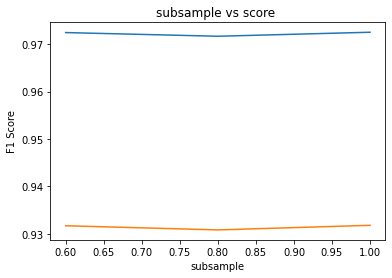

In [ ]:
subsample= [0.6, 0.8, 1.0]
train_scores = []
test_scores = []
for i in subsample:
    clf = XGBClassifier(subsample = i, n_estimators=100 , min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.5, colsample_bytree=1.0)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('subsample = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(subsample,train_scores,label='Train Score')
plt.plot(subsample,test_scores,label='Test Score')
plt.xlabel('subsample')
plt.ylabel('F1 Score')
plt.title('subsample vs score ')
plt.show()

colsample_bytree =  0.6 Train Score 0.9735821545378142 test Score 0.932697582176463
colsample_bytree =  0.8 Train Score 0.9724419804544442 test Score 0.9314485548158761
colsample_bytree =  1.0 Train Score 0.9725185575791994 test Score 0.9318162627712573


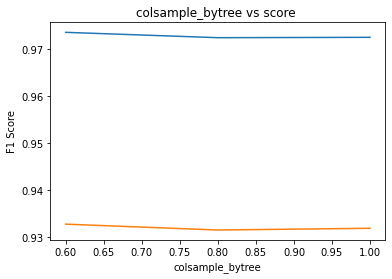

In [ ]:
colsample_bytree = [0.6, 0.8, 1.0]
train_scores = []
test_scores = []
for i in colsample_bytree:
    clf = XGBClassifier(subsample = 1.0, n_estimators=100 , min_child_weight=5, max_depth=5, learning_rate=0.05, gamma=0.5, colsample_bytree=i)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('colsample_bytree = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(colsample_bytree,train_scores,label='Train Score')
plt.plot(colsample_bytree,test_scores,label='Test Score')
plt.xlabel('colsample_bytree')
plt.ylabel('F1 Score')
plt.title('colsample_bytree vs score ')
plt.show()

max_depth =  3 Train Score 0.9645580430671628 test Score 0.9256365862928085
max_depth =  4 Train Score 0.9714332023177601 test Score 0.930054875474884
max_depth =  5 Train Score 0.9735821545378142 test Score 0.932697582176463
max_depth =  10 Train Score 0.9820664891470992 test Score 0.930538516857735


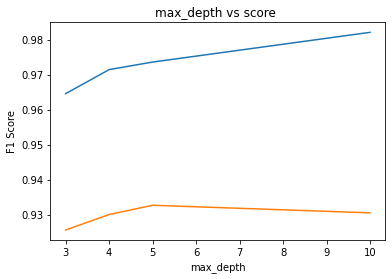

In [ ]:
max_depth = [3, 4, 5,10]
train_scores = []
test_scores = []
for i in max_depth:
    clf = XGBClassifier(subsample = 1.0, n_estimators=100 , min_child_weight=5, max_depth=i, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('max_depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(max_depth,train_scores,label='Train Score')
plt.plot(max_depth,test_scores,label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('F1 Score')
plt.title('max_depth vs score ')
plt.show()

min_child_weight =  1 Train Score 0.9733823365630917 test Score 0.933043716653662
min_child_weight =  5 Train Score 0.9735821545378142 test Score 0.932697582176463
min_child_weight =  10 Train Score 0.9736269298911667 test Score 0.933454185198457


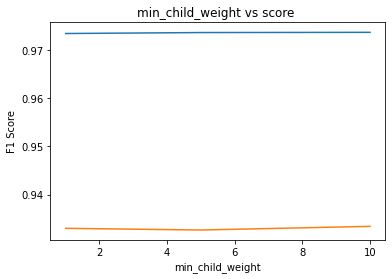

In [ ]:
min_child_weight = [1, 5, 10]
train_scores = []
test_scores = []
for i in min_child_weight:
    clf = XGBClassifier(subsample = 1.0, n_estimators=100 , min_child_weight=i, max_depth=5, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('min_child_weight = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(min_child_weight,train_scores,label='Train Score')
plt.plot(min_child_weight,test_scores,label='Test Score')
plt.xlabel('min_child_weight')
plt.ylabel('F1 Score')
plt.title('min_child_weight vs score ')
plt.show()

In [ ]:
uniform(0.01,0.03,0.05,0.1,0.15,0.2),
0.5, 1, 1.5, 2, 5),
'subsample': [0.6, 0.8, 1.0],
'colsample_bytree': [0.6, 0.8, 1.0],

In [ ]:
xgboost = XGBClassifier()
params = {
        'min_child_weight': sp_randint(1,10),
        'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' :sp_randint(60,100),
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': sp_randint(3,10)
          }
          
clf2=RandomizedSearchCV(xgboost,param_distributions = params,verbose=10,n_jobs=-1,random_state=42,scoring='f1',return_train_score=True)
clf2.fit(X_train,y_train)
print('mean test scores',clf2.cv_results_['mean_test_score'])
print('mean train scores',clf2.cv_results_['mean_train_score'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
mean test scores [0.97953322 0.97197283 0.96732525 0.97396556 0.97436622 0.97223802
 0.92905581 0.97977453 0.973398   0.96763486]
mean train scores [0.98850685 0.9725656  0.9682113  0.97564472 0.97533653 0.97435968
 0.92927394 0.99012561 0.9752051  0.96832398]


In [ ]:
print('Best score:', clf2.best_score_)
print('Best score:', clf2.best_params_)

Best score: 0.9797745306900794
Best score: {'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 73, 'subsample': 0.6}


In [ ]:
best_clf2 = XGBClassifier(subsample = 0.6, n_estimators=73 , min_child_weight=3, max_depth=9, learning_rate=0.15, gamma=2, colsample_bytree=1.0)
best_clf2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=73, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
print("f1 score for train data",f1_score(y_train,best_clf2.predict(X_train)))
print("f1 score for test data",f1_score(y_test,best_clf2.predict(X_test)))

f1 score for train data 0.9876163480288683
f1 score for test data 0.9271469789545147


In [ ]:
best_clf2 = XGBClassifier(subsample = 0.6, n_estimators=73 , min_child_weight=3, max_depth=9, learning_rate=0.15, gamma=2, colsample_bytree=1.0)
best_clf2.fit(X_train,y_train)
clf = CalibratedClassifierCV(best_clf2,method="sigmoid",n_jobs=-1)
clf.fit(X_train,y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    callbacks=None,
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1.0,
                                                    early_stopping_rounds=None,
                                                    enable_categorical=False,
                                                    eval_metric=None, gamma=2,
                                                    gpu_id=-1,
                                                    grow_policy='depthwise',
                                                    importance_type=None,
                                                    interaction_constraints='',
                                            

In [ ]:
print("f1 score for train data",f1_score(y_train,clf.predict(X_train)))
print("f1 score for test data",f1_score(y_test,clf.predict(X_test)))

f1 score for train data 0.989572889512733
f1 score for test data 0.9307700433083341


the train log loss is 0.030108909563905897


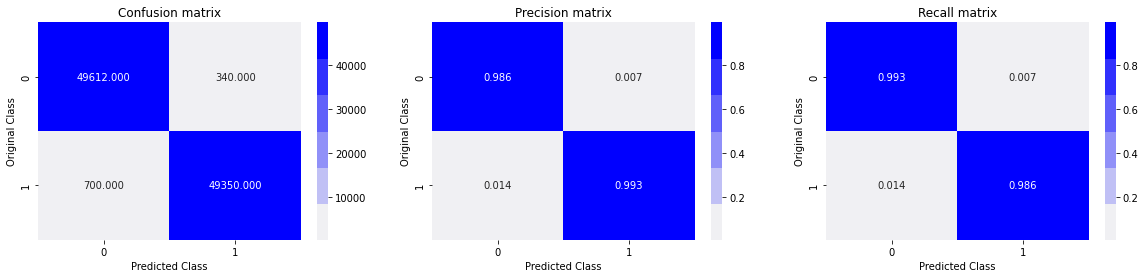

the test log loss is 0.26979582114827527


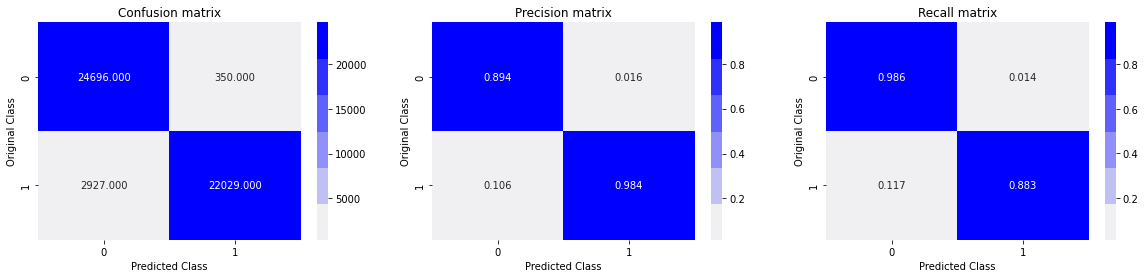

In [ ]:
from sklearn.metrics import log_loss
predict_y = clf.predict_proba(X_train)
print("the train log loss is",log_loss(y_train,predict_y,labels=best_clf2.classes_))
plot_confusion_matrix(y_train,clf.predict(X_train))

predict_y = clf.predict_proba(X_test)
print("the test log loss is",log_loss(y_test,predict_y,labels = best_clf2.classes_))
plot_confusion_matrix(y_test,clf.predict(X_test))


Conclusion :-

1. Log loss for the test data is 0.269
2. F1 score for test  data of the model is 0.930 and train score is 0.989